# Car sale prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#load the data set
#Market analysis
#Linear prediction to predict what price of the car will be bought using annual income of the person
data = pd.read_csv("car_data.csv")

In [3]:
data

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


In [4]:
#drop missing values
data.dropna(inplace=True)
#data preperation
data['Date']=pd.to_datetime(data['Date']) #convert to datetime
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23905 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Car_id         23905 non-null  object        
 1   Date           23905 non-null  datetime64[ns]
 2   Customer Name  23905 non-null  object        
 3   Gender         23905 non-null  object        
 4   Annual Income  23905 non-null  int64         
 5   Dealer_Name    23905 non-null  object        
 6   Company        23905 non-null  object        
 7   Model          23905 non-null  object        
 8   Engine         23905 non-null  object        
 9   Transmission   23905 non-null  object        
 10  Color          23905 non-null  object        
 11  Price ($)      23905 non-null  int64         
 12  Dealer         23905 non-null  object        
 13  Body Style     23905 non-null  object        
 14  Phone          23905 non-null  int64         
 15  Dealer_Region  23905 non

13833     922000
12619      13500
18852     515501
23439      13500
5294      940000
          ...   
6175       13500
9705     1850000
11191     365000
9257     2020000
8788      891000
Name: Annual Income, Length: 14343, dtype: int64

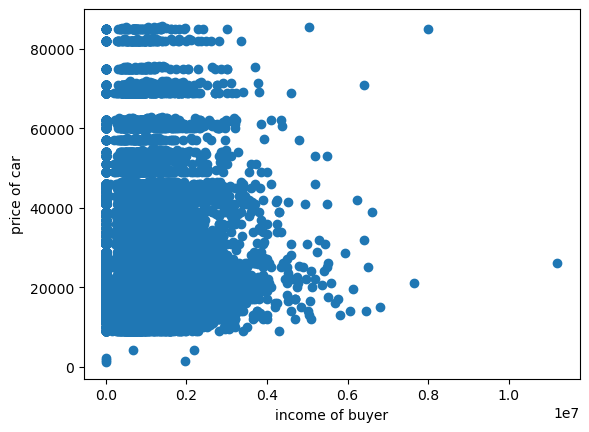

In [5]:
#linear regresion car price and annual income
data1 = data[['Annual Income', 'Price ($)']]
#data1.info()
X = data1['Annual Income']
y = data1['Price ($)']
plt.scatter(X, y)
plt.ylabel("price of car")
plt.xlabel("income of buyer")
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=23)
X_train

In [6]:
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
c = lr.intercept_
c

27827.111084139306

In [7]:
m=lr.coef_
m

array([0.00032259])

In [8]:
Y_pred_train = m*X_train + c
Y_pred_train.flatten()

array([28124.53445422, 27831.46598164, 27993.40397427, ...,
       27944.85460917, 28478.73278432, 28114.53431922])

In [9]:
y_pred_train1 = lr.predict(X_train)
y_pred_train1.flatten()

array([28124.53445422, 27831.46598164, 27993.40397427, ...,
       27944.85460917, 28478.73278432, 28114.53431922])

Text(0.5, 0, 'income of buyer')

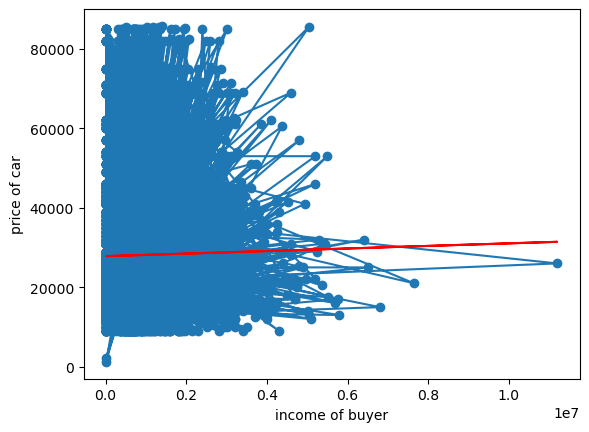

In [10]:
plt.scatter(X_train,y_train)
plt.plot(X_train, y_train)
plt.plot(X_train, y_pred_train1, color='red')
plt.ylabel("price of car")
plt.xlabel("income of buyer")

In [11]:
y_pred_test1= lr.predict(X_test)
y_pred_test1

array([28272.27838426, 27831.46598164, 27831.46598164, ...,
       28167.43825923, 27831.46598164, 28554.54025934])

Text(0.5, 0, 'income of buyer')

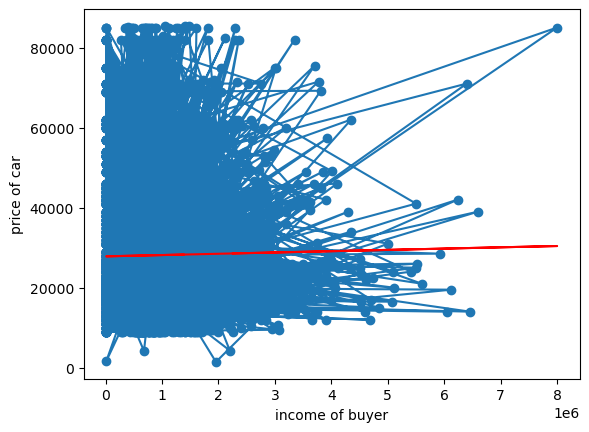

In [12]:
plt.scatter(X_test,y_test)
plt.plot(X_test, y_test)
plt.plot(X_test, y_pred_test1, color='red')
plt.ylabel("price of car")
plt.xlabel("income of buyer")

So the Annual Income of a person has a small positive relationship with the price that an individual will pay for a car